### Data visualizations with Pandas

For Visualizations, we will show basic plots, bar plots, Histograms, Box Plots, Area Plots, Scatter plots, Hexagonal Bin Plots, Pie Plots, Plotting Tools with the help of matplotlib Library and Seaborn

In [1]:
### Some helper imports
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from plotnine import ggplot, aes, geom_line
import plotnine
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
from datetime import datetime, timedelta

### A little refresher on pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. It also gives visualizing opportunities.

### Basic Plots

The plot method on Series and DataFrame is just a simple wrapper around plt.plot()

In [2]:
ts = pd.Series(np.random.randn(200), index = pd.date_range("1/1/2021", periods=200))

ts = pd.Series(...): This line creates a pandas Series object and assigns it to the variable ts. A Series is a one-dimensional labeled array that can hold any data type.

np.random.randn(200): This code uses NumPy's random module to generate an array of 200 random numbers drawn from a standard normal distribution (mean 0 and standard deviation 1). These random numbers represent the values of the time series.

index = pd.date_range("1/1/2021", periods=200): This line creates a date range for the index of the Series. The pd.date_range() function generates a sequence of dates starting from "1/1/2021" and consisting of 200 periods (days in this case). The resulting index represents the time component of the time series.

Putting it all together, the code creates a time series (ts) with 200 data points, where the values are randomly generated and the index represents the corresponding dates starting from January 1, 2021.

This time series can be used for various time-based analysis, such as plotting, aggregation, or time series forecasting.

In [3]:
ts = ts.cumsum()

By applying .cumsum() to the ts Series, the code modifies the ts Series itself, replacing the original values with the cumulative sums of those values.

For example, if the original values in the ts Series were [1, 2, 3, 4], then applying .cumsum() would transform the Series to [1, 3, 6, 10]. Each element in the new Series represents the sum of all the preceding elements in the original Series.

The cumulative sum is often used to analyze the trend or cumulative effect of a variable over time. It can be useful for visualizing the progression of a time series or calculating running totals in financial or statistical analysis.

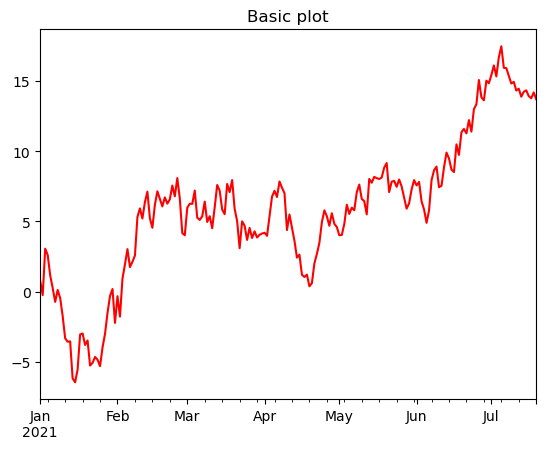

In [4]:
ts.plot(color='red')
plt.title("Basic plot")
plt.show()

### We can also make plots that has many columns

<Figure size 640x480 with 0 Axes>

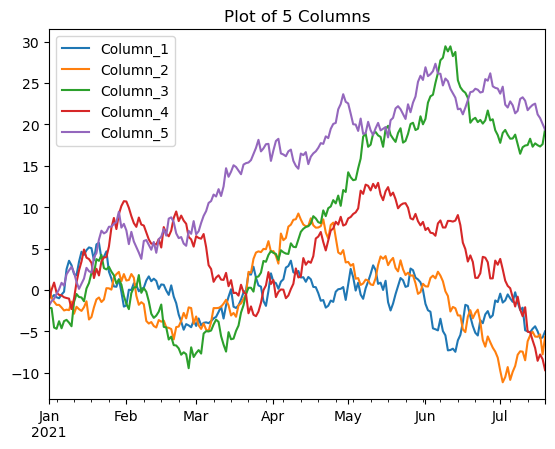

In [5]:
df = pd.DataFrame(np.random.randn(200, 5), index=ts.index, columns=["Column_1", "Column_2", "Column_3", "Column_4", "Column_5"])
df = df.cumsum()

plt.figure()
df.plot()
plt.title("Plot of 5 Columns")
plt.show()


### Some explanation of Above written code for 5 columns

df = pd.DataFrame(np.random.randn(200, 5), index=ts.index, columns=["Column_1", "Column_2", "Column_3", "Column_4", "Column_5"]): This line creates a DataFrame called df with 200 rows and 5 columns. The values in the DataFrame are randomly generated using np.random.randn(). The index parameter is set to ts.index to align the index of the DataFrame with the previously generated time series ts. The columns parameter specifies the names of the 5 columns.

df = df.cumsum(): This line applies the cumulative sum operation to each column of the DataFrame df. The resulting DataFrame contains cumulative sums for each column, showing the accumulation of values over time.

plt.figure(): This line creates a new figure for the plot using the figure() function from matplotlib.pyplot. This step is optional since calling plot() without a figure will create a new figure automatically.

df.plot(): This line generates a line plot of all columns in the DataFrame df. The plot() method is called on the DataFrame itself, and it uses the index as the x-axis values. Each column in the DataFrame is plotted as a separate line on the same plot.

plt.title("Plot of 5 Columns"): This line sets the title of the plot to "Plot of 5 Columns" using the title() function from matplotlib.pyplot. It provides a descriptive title for the plot.

plt.show(): This line displays the plot on the screen. The show() function from matplotlib.pyplot is called to show the plot window.

By including df.plot() without specifying any specific columns, it will plot all columns in the DataFrame. This will generate a plot with separate lines for each of the 5 columns, allowing you to visualize the cumulative sum of each column over time.

### We can plot one column versus another using the x and y keywords

In [6]:
notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

study_hours = [1, 2, 2, 3, 4, 4, 4, 6, 6, 7, 7, 9, 9, 11, 13]

exam_notes = pd.DataFrame(notes, columns=["Notes"])
exam_notes["study_hours"] = pd.Series(study_hours)

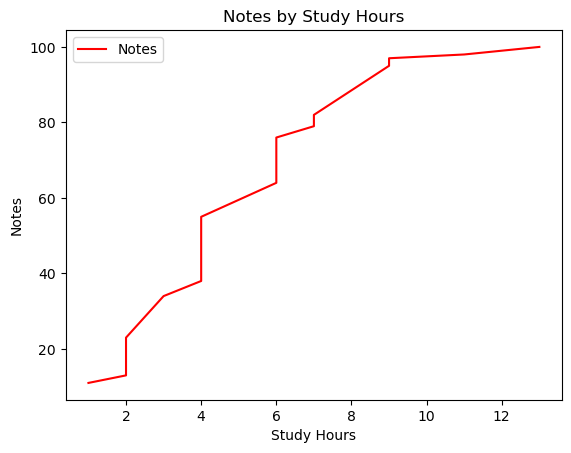

In [7]:
exam_notes.plot(x="study_hours",y="Notes", color="red")
plt.title("Notes by Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Notes")
plt.show()

### Bar Plots

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

We can create barplots by specifying kind of plot as bar

In [8]:
x = pd.Series(["A","B","C","D"])
y = pd.Series([3,8,1,10])
df = pd.DataFrame({"Letters":x, "Numbers":y})
df.index = x ### Setting index

In [9]:
df

,Letters,Numbers
A,A,3
B,B,8
C,C,1
D,D,10


### Now bar plotting

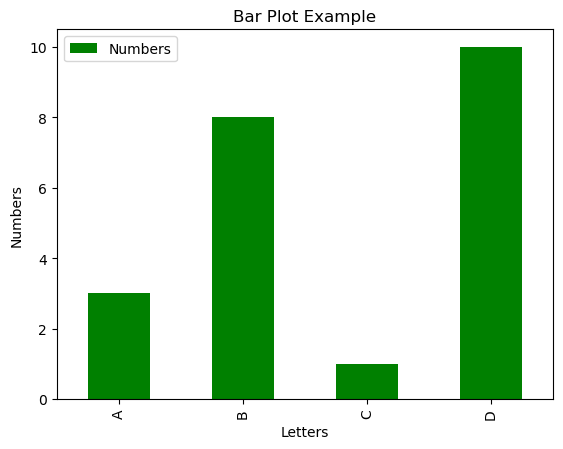

In [10]:
df.plot(kind="bar", color="green")
plt.title("Bar Plot Example")

plt.xlabel("Letters")
plt.ylabel("Numbers")
plt.show()

We can make multiple bar plots at the same time. plt.bar() function will help us for that

In [14]:
df = pd.DataFrame(np.random.rand(7, 5), columns=["Michael","Richel","Mike","Kate","Wattson"])

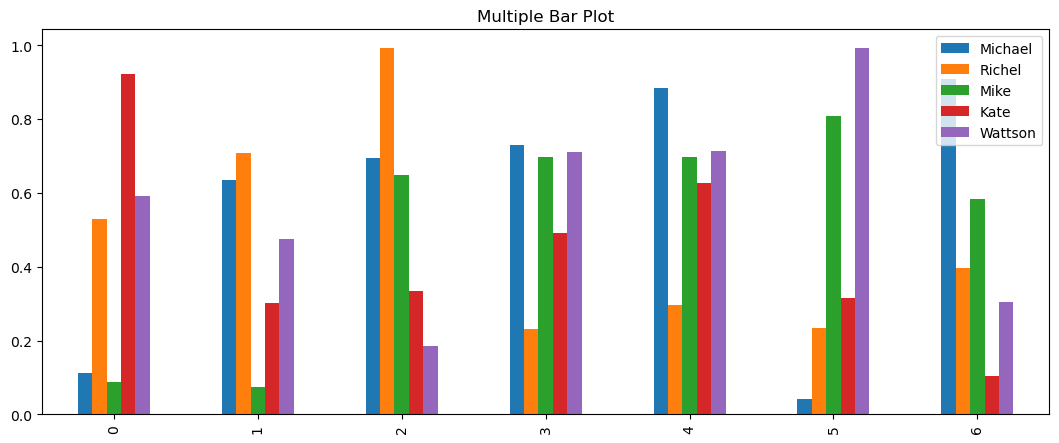

In [15]:
df.plot.bar(figsize = (13,5))
plt.title("Multiple Bar Plot")
plt.show()

In order to produce a stacked bar plot, pass stacked argument True.

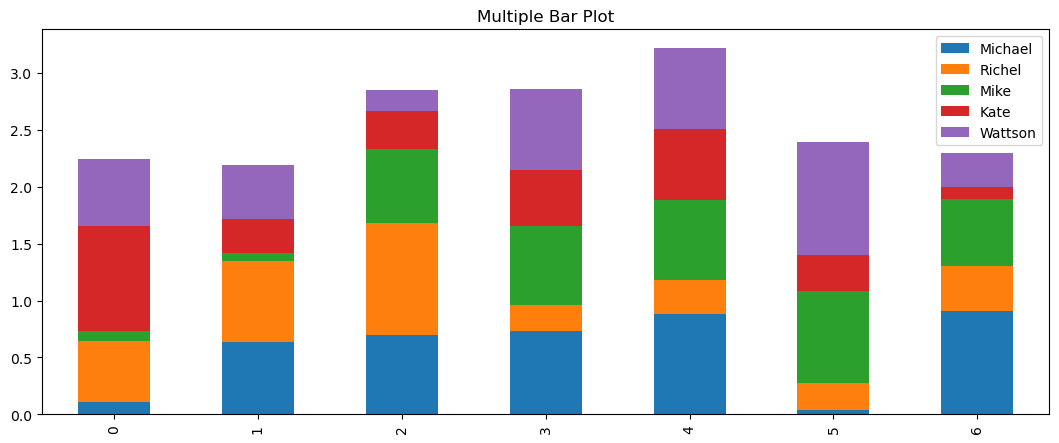

In [16]:
df.plot.bar(figsize=(13,5), stacked=True)
plt.title("Multiple Bar Plot")
plt.show()

In order to get horizontal bar plots, we can use the plt.barh() method

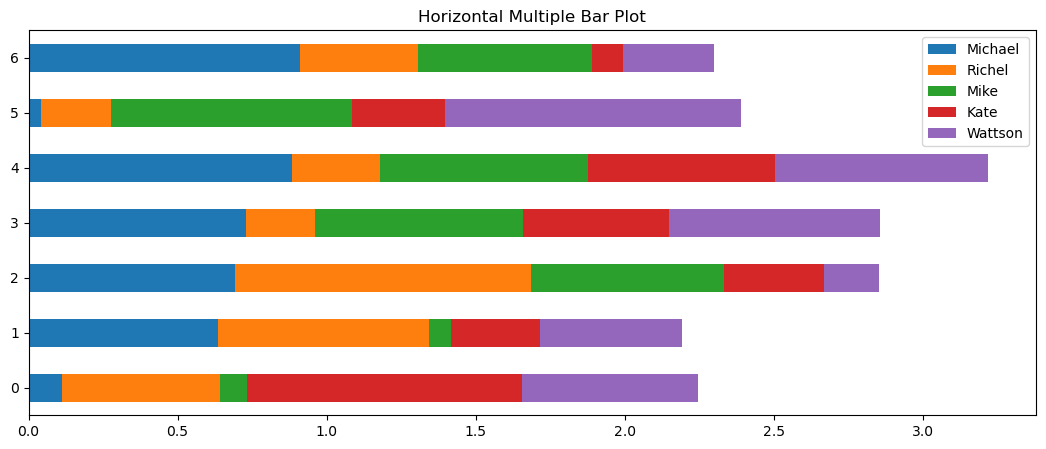

In [17]:
df.plot.barh(figsize=(13,5), stacked=True)
plt.title("Horizontal Multiple Bar Plot")
plt.show()

### Histograms

A histogram is a graph showing frequency distributions
It is a graph showing the number of observations within each given interval

We can use plt.hist() function for plotting histogram

In [21]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes},
                    columns=["First Notes","Second Notes","Final Notes"])

In [22]:
notes.head()

,First Notes,Second Notes,Final Notes
0,11,74,53
1,13,13,43
2,23,23,65
3,34,53,12
4,38,64,76


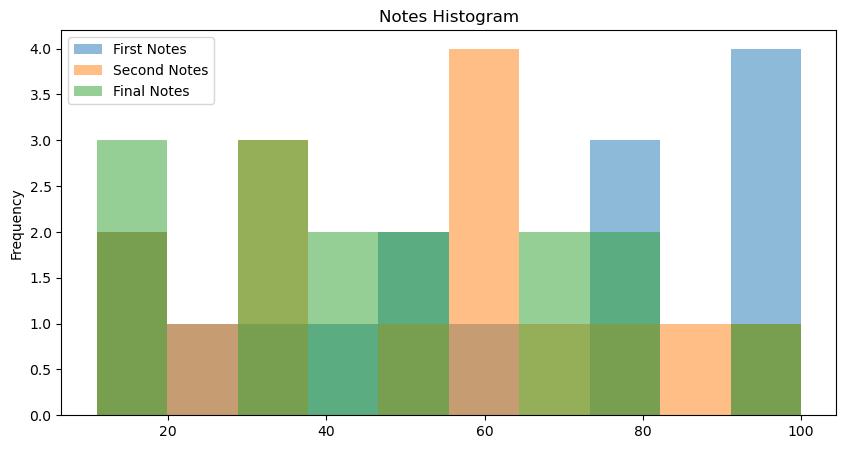

In [23]:
notes.plot.hist(figsize = (10,5), alpha=0.5)
plt.title("Notes Histogram")
plt.show()

We can stack a histogram by making stacked argument True. Bin Size can be changed using the bins keyword.

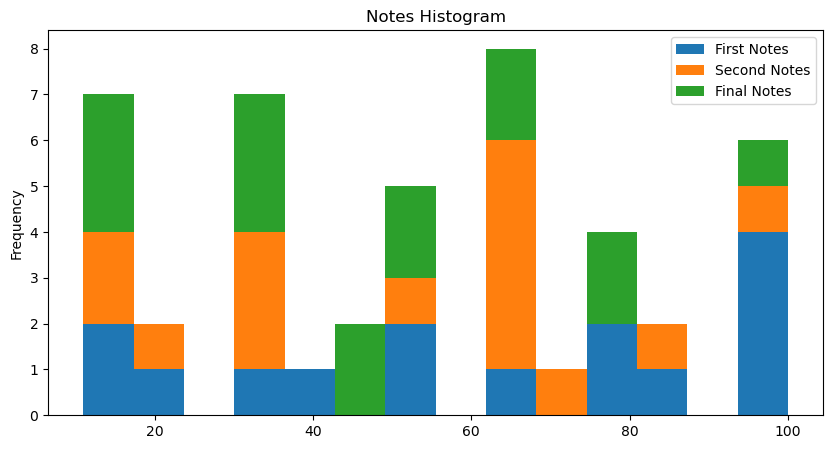

In [24]:
notes.plot.hist(figsize=(10,5),stacked=True,bins=14)
plt.title("Notes Histogram")
plt.show()

We can draw horizontal and cumulative histograms by making orientation argument 'horizontal' and cumulative argument True.

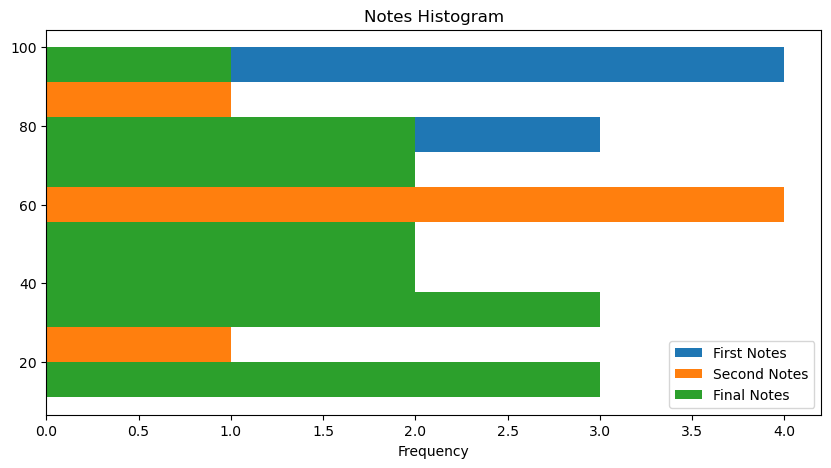

In [26]:
notes.plot.hist(figsize=(10,5), orientation="horizontal")
plt.title("Notes Histogram")
plt.show()

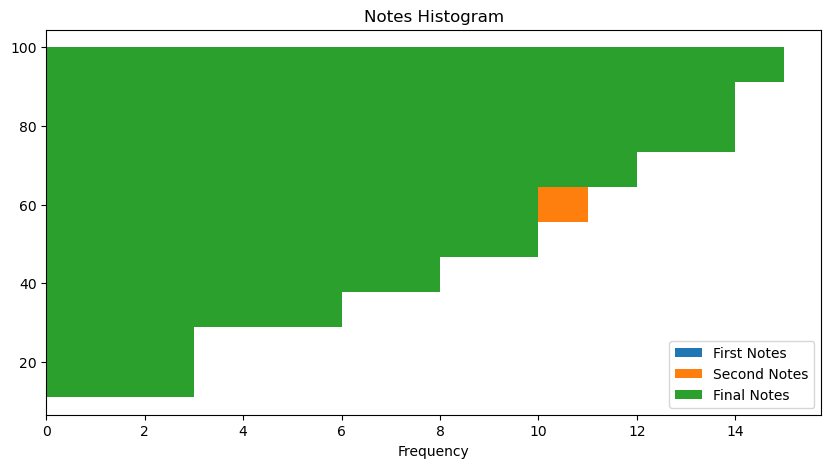

In [27]:
notes.plot.hist(figsize=(10,5),orientation="horizontal",cumulative=True)
plt.title("Notes Histogram")
plt.show()

### Box Plots

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles. We will use plt.boxplot() function for that.

In order to draw box plots, we can use plot.box() function.

In [28]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes},
                    columns=["First Notes","Second Notes","Final Notes"])

In [29]:
notes.head()

,First Notes,Second Notes,Final Notes
0,11,74,53
1,13,13,43
2,23,23,65
3,34,53,12
4,38,64,76


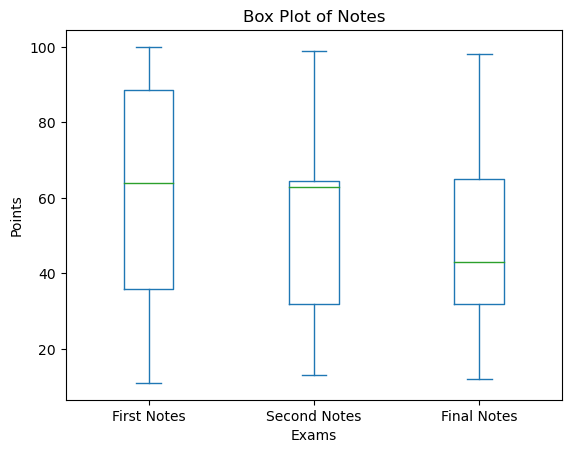

In [30]:
notes.plot.box()

plt.title("Box Plot of Notes")
plt.xlabel("Exams")
plt.ylabel("Points")
plt.show()

We can colorize Boxplot by passing color keyword

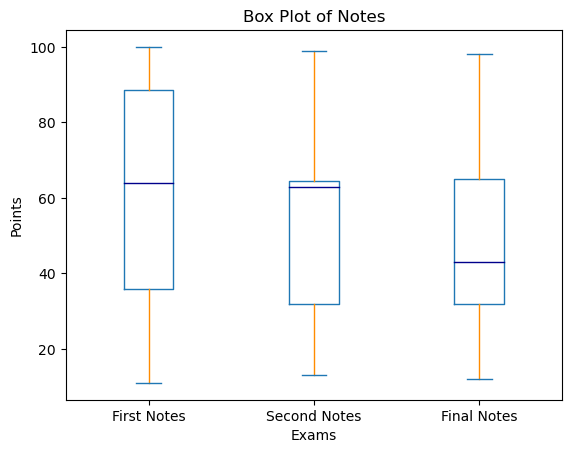

In [33]:
notes.plot.box(color = {"whiskers": "DarkOrange","medians": "DarkBlue"}, sym= "o")

plt.title("Box Plot of Notes")
plt.xlabel("Exams")
plt.ylabel("Points")
plt.show()

We can draw horizontal box plot by making vert argument False

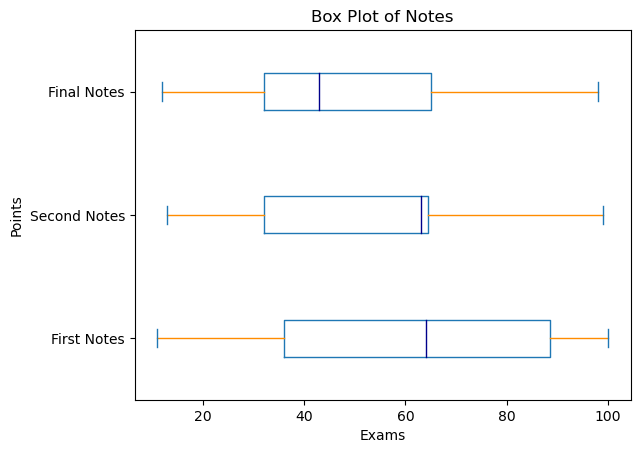

In [34]:
notes.plot.box(color={"whiskers":"DarkOrange","medians":"DarkBlue"}, vert=False)

plt.title("Box Plot of Notes")
plt.xlabel("Exams")
plt.ylabel("Points")
plt.show()

### Area Plots

plot.area() function can be used to make area plots

In [35]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes},
                    columns=["First Notes","Second Notes","Final Notes"])

In [36]:
notes.head()

,First Notes,Second Notes,Final Notes
0,11,74,53
1,13,13,43
2,23,23,65
3,34,53,12
4,38,64,76


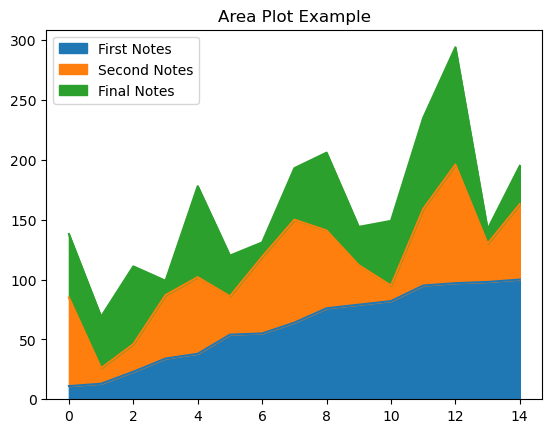

In [37]:
notes.plot.area()
plt.title("Area Plot Example")
plt.show()

In order to produce an unstacked plot, we need to pass stacked argument False.

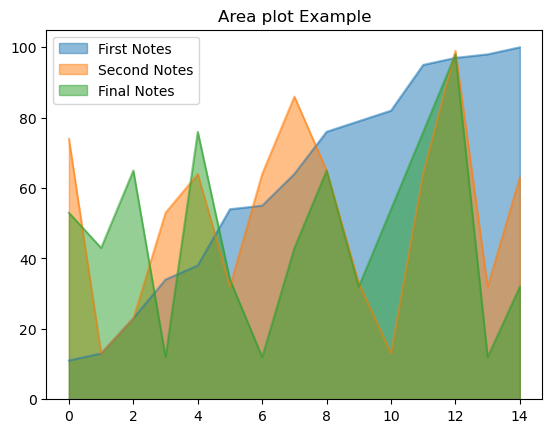

In [38]:
notes.plot.area(stacked=False)
plt.title("Area plot Example")
plt.show()

### Scatter Plots

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another.

We can create scatter plots by using plt.scatter() function.

In [39]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes},
                    columns=["First Notes","Second Notes","Final Notes"])

In [40]:
notes.head()

,First Notes,Second Notes,Final Notes
0,11,74,53
1,13,13,43
2,23,23,65
3,34,53,12
4,38,64,76


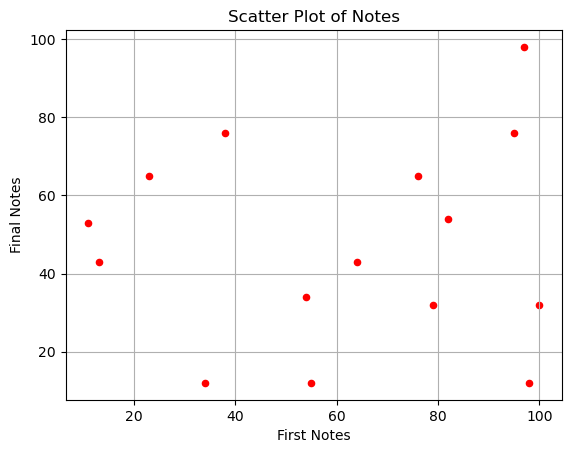

In [41]:
notes.plot.scatter(x="First Notes", y="Final Notes", color="red")

plt.title("Scatter Plot of Notes")
plt.grid(True)
plt.show()

In order to plot multiple column groups in a single axes, we should repeat plot() method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups.

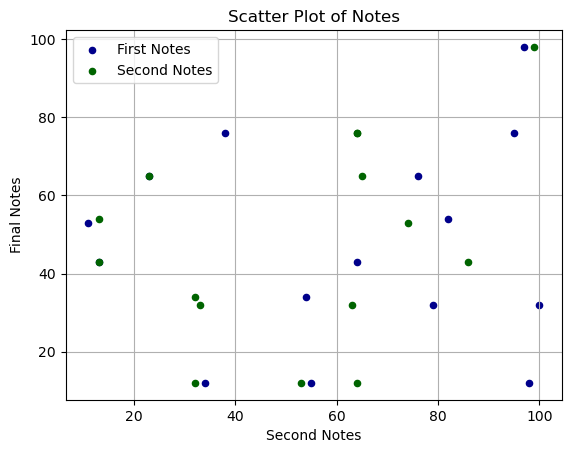

In [42]:
ax = notes.plot.scatter(x="First Notes",y="Final Notes",color="DarkBlue",label="First Notes")
notes.plot.scatter(x="Second Notes",y="Final Notes",color="DarkGreen",label="Second Notes", ax=ax)

plt.title("Scatter Plot of Notes")
plt.grid(True)
plt.show()

We can give third parameter as point size.

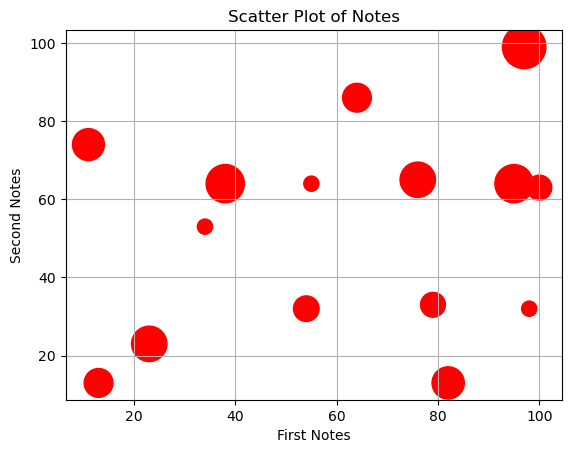

In [43]:
notes.plot.scatter(x="First Notes", y="Second Notes",s=notes["Final Notes"]*10,c="r")

plt.title("Scatter Plot of Notes")
plt.grid(True)
plt.show()

### Hexagonal Bin Plots

Hexagonal Binning is another way to manage the problem of having to many points that start to overlap. Hexagonal binning plots density, rather than points. Points are binned into gridded hexagons and distribution (the number of points per hexagon) is displayed using either the color or the area of the hexagons.

We can use plt.hexbin() function for that.

In [44]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes},
                    columns=["First Notes","Second Notes","Final Notes"])

In [45]:
notes.head()

,First Notes,Second Notes,Final Notes
0,11,74,53
1,13,13,43
2,23,23,65
3,34,53,12
4,38,64,76


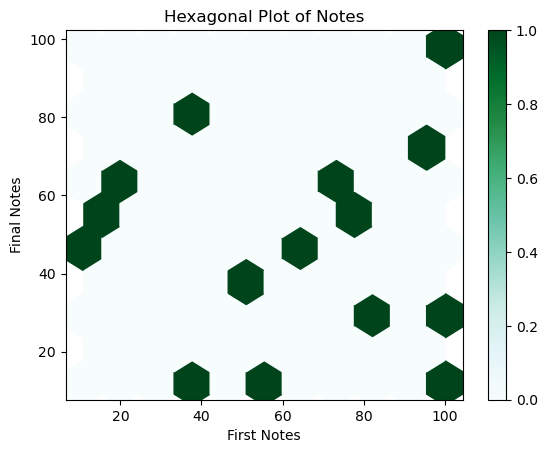

In [46]:
notes.plot.hexbin(x="First Notes",y="Final Notes",gridsize=10)
plt.title("Hexagonal Plot of Notes")
plt.show()

Gridsize argument controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.

In [47]:
df = pd.DataFrame(np.random.randn(2000,2), columns=["Column A","Column B"])
df["Column B"] = df["Column B"] + np.arange(2000)

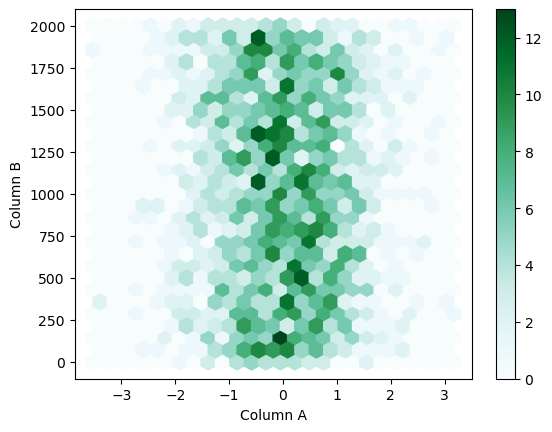

In [48]:
df.plot.hexbin(x="Column A",y="Column B",gridsize=25)
plt.show()

### Pie Plots

A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area), is proportional to the quantity it represents.

We can use plt.pie() function to create pie plots.

In [49]:
letters = pd.Series([3,8,1,10],index=["A","B","C","D"],name="Letters")

Text(0.5, 1.0, 'Pie Chart of Letters')

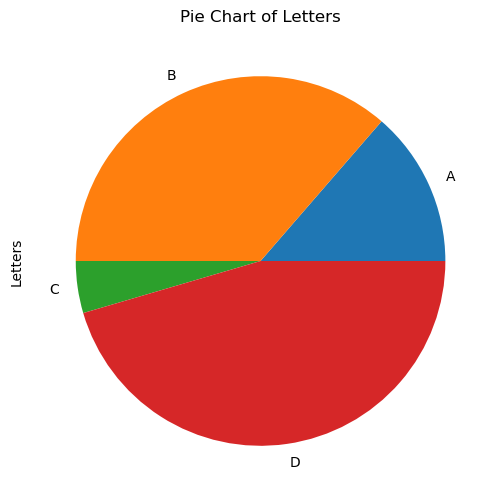

In [50]:
letters.plot.pie(figsize=(6,6))
plt.title("Pie Chart of Letters")

We can use the labels and colors arguments to specify the labels and colors of each wedge.

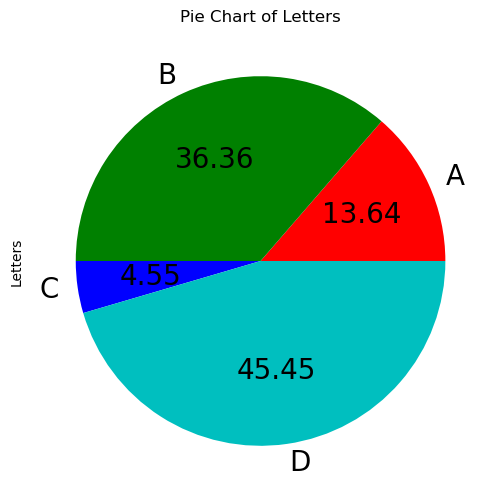

In [52]:
letters.plot.pie(figsize=(6,6),colors=["r", "g", "b", "c"],autopct="%.2f",fontsize=20)

plt.title("Pie Chart of Letters");
plt.show()

If we pass values that sum total is less than 1.0, it draws a semicircle.

In [55]:
series = pd.Series([0.2] * 4, index=["C1", "C2", "C3", "C4"], name="Semicircle Example")

[0.2] * 4: This part creates a list [0.2, 0.2, 0.2, 0.2] containing four elements, each having the value 0.2. The * operator is used to repeat the value 0.2 four times.

index=["C1", "C2", "C3", "C4"]: This part specifies the index labels for the Series. The index parameter is set to a list containing the strings "C1", "C2", "C3", and "C4". These strings will be used as the index labels for the Series elements.

name="Semicircle Example": This part sets the name of the Series to "Semicircle Example". The name parameter is used to provide a descriptive name for the Series itself.

<Axes: ylabel='Semicircle Example'>

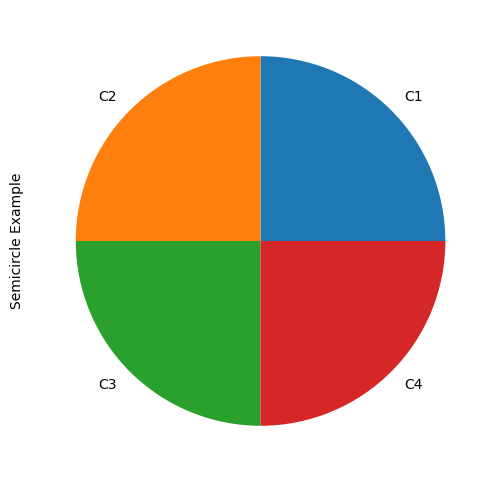

In [56]:
series.plot.pie(figsize=(6,6))

### Plotting Tools

We can import these functions from pandas.plotting and give a Series or DataFrame as an argument.

In [57]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes},
                    columns=["First Notes","Second Notes","Final Notes"])

In [58]:
notes.head()

,First Notes,Second Notes,Final Notes
0,11,74,53
1,13,13,43
2,23,23,65
3,34,53,12
4,38,64,76


### Scatter Matrix Plots

We can create a scatter plot matrix using the scatter_matrix() method

array([[<Axes: xlabel='First Notes', ylabel='First Notes'>,
        <Axes: xlabel='Second Notes', ylabel='First Notes'>,
        <Axes: xlabel='Final Notes', ylabel='First Notes'>],
       [<Axes: xlabel='First Notes', ylabel='Second Notes'>,
        <Axes: xlabel='Second Notes', ylabel='Second Notes'>,
        <Axes: xlabel='Final Notes', ylabel='Second Notes'>],
       [<Axes: xlabel='First Notes', ylabel='Final Notes'>,
        <Axes: xlabel='Second Notes', ylabel='Final Notes'>,
        <Axes: xlabel='Final Notes', ylabel='Final Notes'>]], dtype=object)

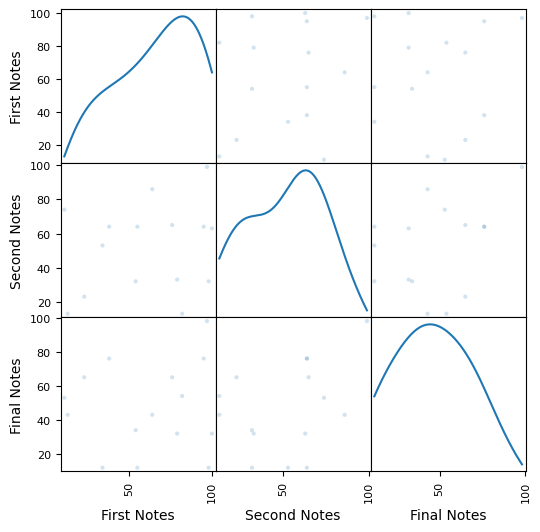

In [59]:
scatter_matrix(notes, alpha=0.2, figsize=(6,6), diagonal="kde")

The code scatter_matrix(notes, alpha=0.2, figsize=(6,6), diagonal="kde") generates a scatter matrix plot for the "notes" DataFrame. Let's break down the code and explain the parameters used:

scatter_matrix(): This is a function from the pandas.plotting module. It is used to create a scatter matrix plot, which displays pairwise scatter plots of multiple variables in a DataFrame.

notes: This is the DataFrame that is being passed as the input to the scatter matrix plot. It contains the data to be visualized.

alpha=0.2: This parameter controls the transparency of the markers in the scatter plot. The value 0.2 sets the transparency to 20%, meaning the markers will be somewhat transparent. This allows for better visualization when there is overlap between data points.

figsize=(6,6): This parameter sets the figure size of the scatter matrix plot. It specifies the width and height of the plot window in inches. In this case, it sets the width and height to 6 inches each. This parameter is optional, and if not provided, the default figure size will be used.

diagonal="kde": This parameter determines the type of plot to be displayed on the diagonal of the scatter matrix. In this case, the value "kde" is provided, which stands for Kernel Density Estimation. It means that the diagonal of the scatter matrix plot will show the kernel density estimate plot for each variable. This provides a smoothed representation of the distribution of each variable.

The resulting scatter matrix plot visualizes the pairwise relationships between variables in the "notes" DataFrame. Each scatter plot in the matrix represents the relationship between two variables, and the diagonal shows the kernel density estimate plot for each variable. The transparency, figure size, and diagonal plot type can be customized according to the specific requirements of the analysis or visualization.

### Density Plots

We can create a density plot matrix using the plt.kde() function

In [61]:
den = pd.Series(np.random.randn(3000))

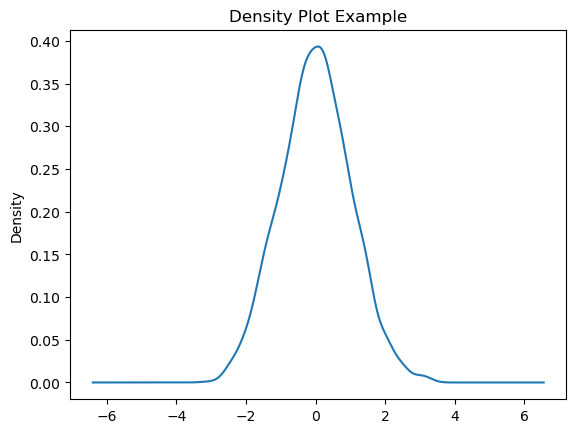

In [62]:
den.plot.kde()
plt.title("Density Plot Example")
plt.show()

### Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. andrews_curves() function will help us to create plots.

For a real world example, we will use iris dataset of Seaborn

In [63]:
iris = sns.load_dataset("iris")

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


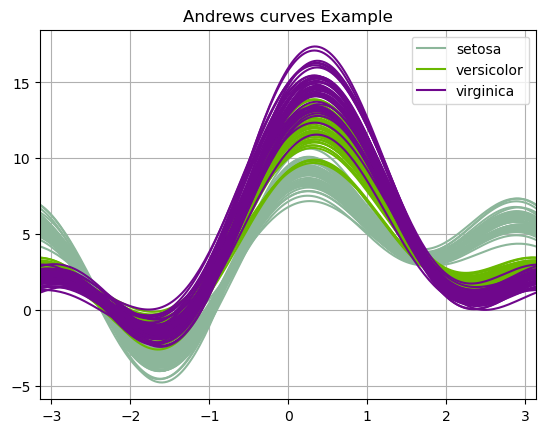

In [65]:
andrews_curves(iris,"species")
plt.title("Andrews curves Example")
plt.show()

### Autocorrelation plot

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero.

We will use autocorrelation_plot() function for that.

In [66]:
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=2000)

np.linspace(): This function from the NumPy library generates a sequence of evenly spaced values within a specified interval.

-9 * np.pi: This expression represents the starting point of the interval. It calculates -9 multiplied by π (pi), where π is a mathematical constant representing the ratio of a circle's circumference to its diameter.

9 * np.pi: This expression represents the ending point of the interval. It calculates 9 multiplied by π.

num=2000: This parameter specifies the number of elements or points to be generated within the interval. In this case, it is set to 2000, so the resulting array will have 2000 elements.

In [67]:
data = pd.Series(0.7 * np.random.randn(2000) + 0.5 * np.sin(spacing))

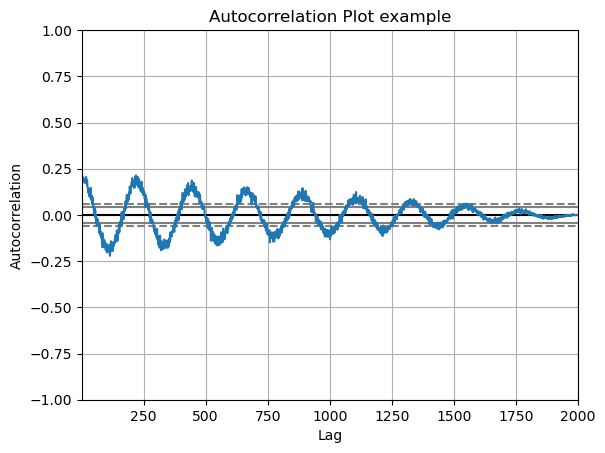

In [68]:
autocorrelation_plot(data)
plt.title("Autocorrelation Plot example")
plt.show()